In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.DataFrame(pd.read_csv("Stars.csv", delimiter=","))
print(data.head(10))
data.dtypes

# TODO: fix data

def transform_column(df, column_name):
    df = df.copy()
    df[column_name] = df[column_name].str.lower()
    df[column_name] = df[column_name].str.replace(' ', '')
    df[column_name] = df[column_name].str.replace('-', '')
    return df

data = transform_column(data, 'Color')
# data.head(10)

   Temperature         L       R    A_M Color Spectral_Class  Type
0         3068  0.002400  0.1700  16.12   Red              M     0
1         3042  0.000500  0.1542  16.60   Red              M     0
2         2600  0.000300  0.1020  18.70   Red              M     0
3         2800  0.000200  0.1600  16.65   Red              M     0
4         1939  0.000138  0.1030  20.06   Red              M     0
5         2840  0.000650  0.1100  16.98   Red              M     0
6         2637  0.000730  0.1270  17.22   Red              M     0
7         2600  0.000400  0.0960  17.40   Red              M     0
8         2650  0.000690  0.1100  17.45   Red              M     0
9         2700  0.000180  0.1300  16.05   Red              M     0


1. Побудувати стовпчикові діаграми, на яких відобразити а) кількість 
зірок різного кольору; 

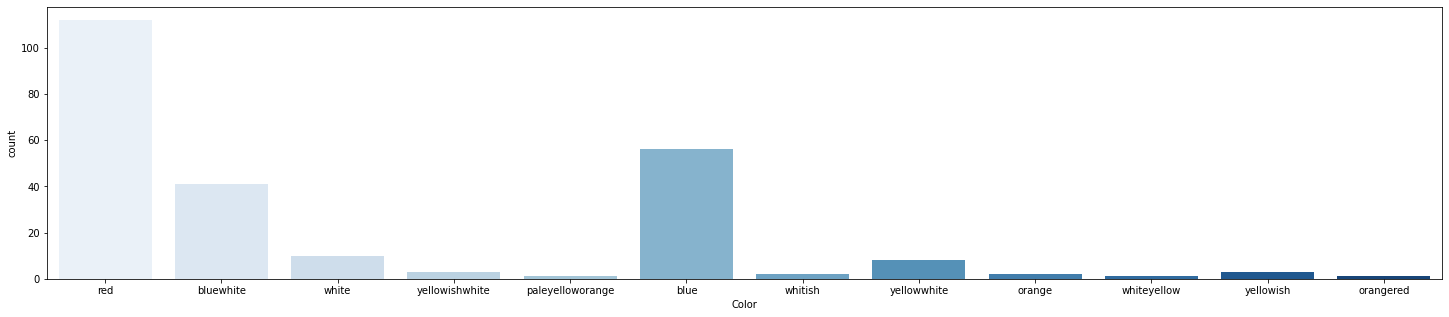

In [14]:
# sns.set(rc={" figure.fisize ":(3,4)})
# plt.rcParams['figure.figsize']=(25, 5) # working variant
sns.countplot(x="Color", data=data, palette="Blues").figure.set_size_inches(25, 5)

б) медіанну температуру зірок різного 
кольору;

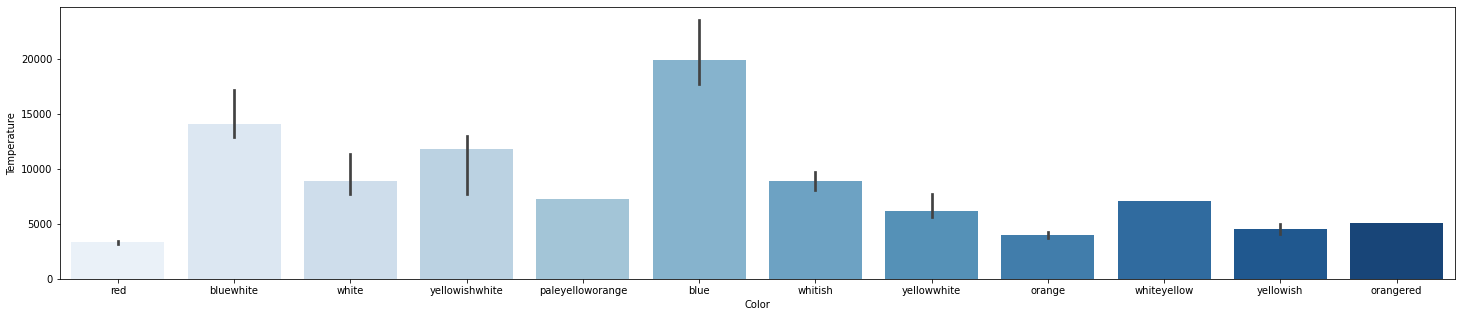

In [15]:
sns.barplot(data = data, x="Color", y="Temperature", estimator=np.median, palette="Blues", capsize=0.0).figure.set_size_inches(25, 5)

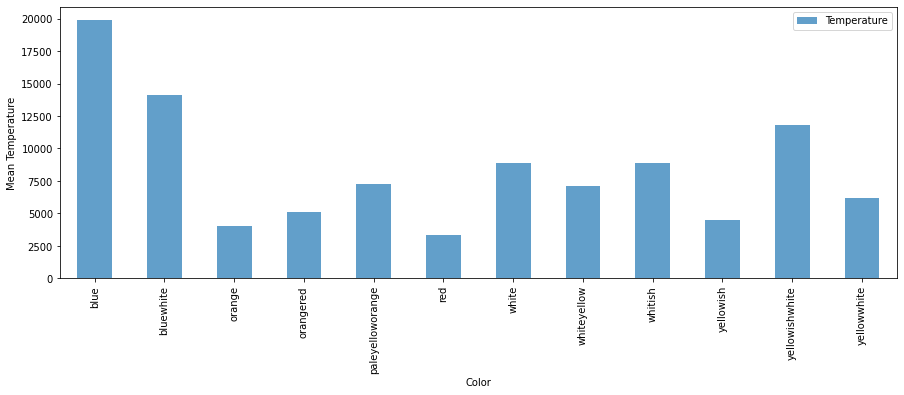

In [16]:
# the same but via pandas
stars_mean_values_by_color = pd.pivot_table(data, values="Temperature", index="Color", aggfunc=np.median)
stars_mean_values_by_color.plot(kind="bar", alpha=0.7, ylabel = "Mean Temperature").figure.set_size_inches(15, 5)

середній радіус зірок різного кольору з розподілом за 
типом зірки

<AxesSubplot:xlabel='Type', ylabel='Mean Radius'>

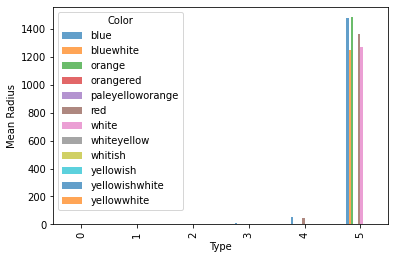

In [17]:
# we need R (radius), Type and Color to be on the plot - 3 variables
mean_radius_by_type_and_color = pd.pivot_table(data, values="R", columns="Color", index="Type", aggfunc=np.mean)
mean_radius_by_type_and_color

mean_radius_by_type_and_color.plot(kind="bar", alpha=0.7, ylabel = "Mean Radius")#.figure.set_size_inches(25, 5)

2. Побудувати гістограму температури, загальну і в залежності від 
спектрального класу.


<AxesSubplot:xlabel='Temperature', ylabel='Count'>

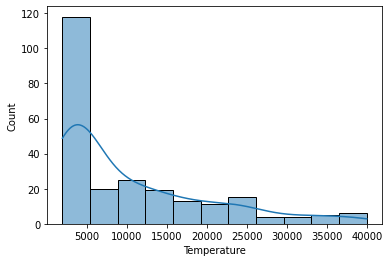

In [18]:
# plt.hist(data["Temperature"], alpha=0.5, histtype="stepfilled", color="steelblue", edgecolor="none")
sns.histplot(data["Temperature"], kde=True)

c:\Python39\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


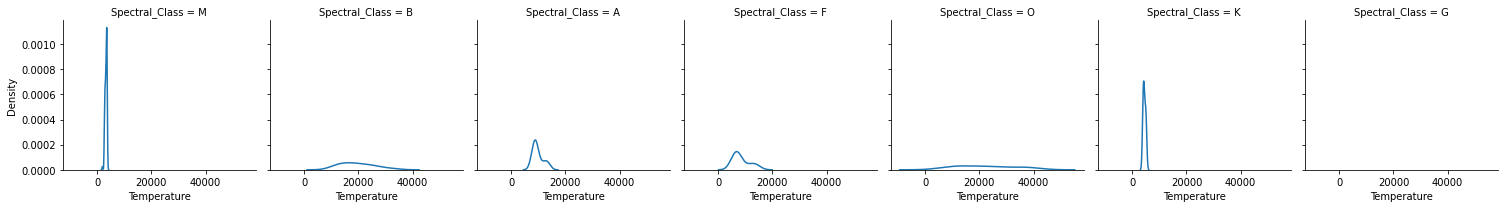

In [19]:
g = sns.FacetGrid(data, col="Spectral_Class")
g = g.map(sns.kdeplot, "Temperature")
# G class has only 1 value in Dataset, so it can be omitted when preparing data for this plot via creating temp Dataset

Побудувати діаграму розмаху світності (загальну і в залежності від 
кольору), визначити чи присутні викиди. 

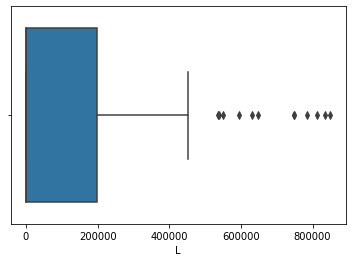

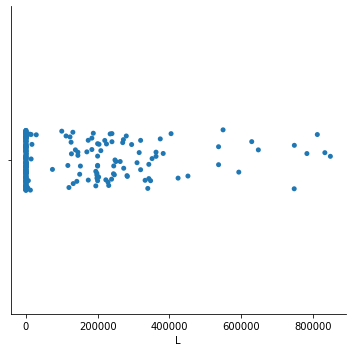

In [20]:
sns.boxplot(data=data, x="L")
sns.catplot(data=data, x="L")

c:\Python39\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


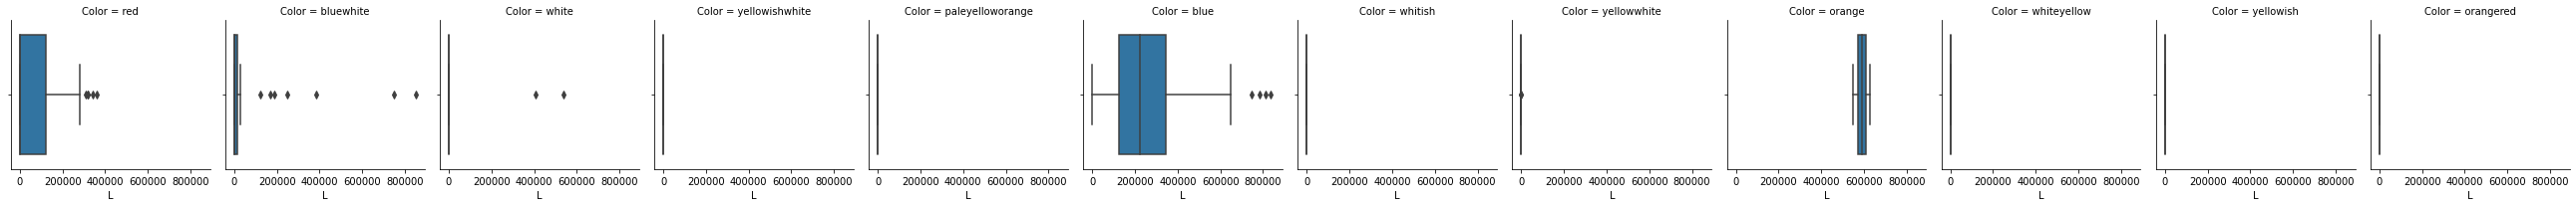

In [21]:
g = sns.FacetGrid(data, col="Color")
g = g.map(sns.boxplot, "L")

4. За допомогою діаграм розсіювання зробити висновки щодо 
залежності між а) температурою і абсолютною величиною; б) 
радіусом та температурою. Порахувати коефіцієнт кореляції за 
допомогою відповідних функцій.

Coef of corelation of Temperature and A_M
We can assert that there is a monotonic relation:  0.00000000000000000489878877828970240573165454805538


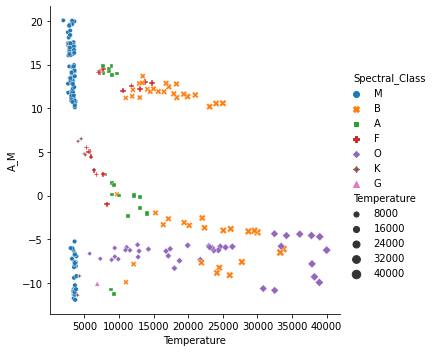

In [22]:
import scipy.stats as stats
temperature_A_M = sns.relplot(data=data, x="Temperature", y="A_M", hue="Spectral_Class", style="Spectral_Class", size="Temperature")

# схоже на негативний криволінійний зв'язок
def to_fixed(numObj, digits=0):
    return f"{numObj:.{digits}f}"

def correlation(dataset, field_1, field_2):
    alpha = 0.05
    if (stats.normaltest(dataset[field_1])[1]>0.05 and stats.normaltest(dataset[field_2])[1]>0.05):
        print("Both fileds are normal")
        cor_stat, cor_p = stats.pearsonr(dataset[field_1], dataset[field_2])
        if cor_p > alpha:
            print("Correlation coef is 0 or it is very weak: ", to_fixed(cor_p, 50))
        else:
            print("Correlation coef is not null: ", to_fixed(cor_p, 50))

    cor_stat_spearman, cor_p_spearman = stats.spearmanr(dataset[field_1], dataset[field_2])
    if cor_p_spearman > alpha:
        print("Monotonous relation is not observed or it is very weak: ", to_fixed(cor_p_spearman, 50))
    else:
        print("We can assert that there is a monotonic relation: ", to_fixed(cor_p_spearman, 50))

print("Coef of corelation of Temperature and A_M")
correlation(data, "Temperature", "A_M")


We can assert that there is a monotonic relation:  0.00007341393839014736253170689828095873963320627809


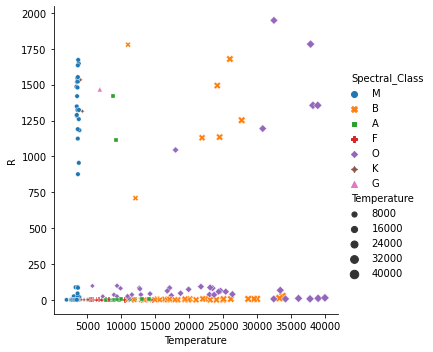

In [23]:
radius_temperature_correlation = sns.relplot(data=data, x="Temperature", y="R", hue="Spectral_Class", style="Spectral_Class", size="Temperature")
correlation(data, "Temperature", "R")
# схоже на постійниї зв'язок